In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
from skimage.exposure import match_histograms

## Q1-1&2. Plot the image & Load the image using RGB system.

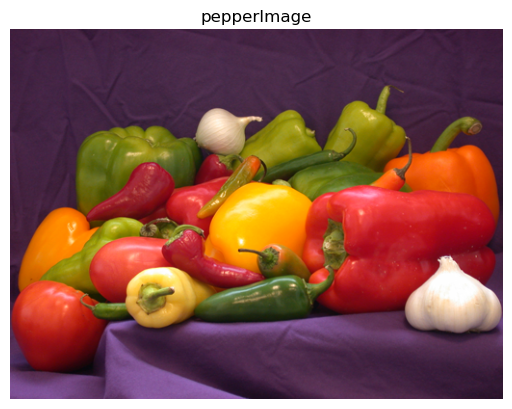

In [2]:
img_path = '/home/jeonk636/MedialImg/Task1/pepperImage.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2는 BGR 순서로 읽어옴

plt.imshow(img)
plt.title('pepperImage')
plt.axis('off')
plt.show()

## Q1-3. Plot R(x,y), G(x,y), B(x,y) using a grey-scale map

In [3]:
# 0은 검은색이고 255는 흰색
# 픽셀 데이터는 벡터이므로 [세로픽셀수, 가로픽셀수, 채널수]의 형태
# R = img[:, :, 0] # R(x, y)
# G = img[:, :, 1] # G(x, y)
# B = img[:, :, 2] # B(x, y)

R = copy.deepcopy(img[:, :, 0])
G = copy.deepcopy(img[:, :, 1])
B = copy.deepcopy(img[:, :, 2])

(-0.5, 511.5, 383.5, -0.5)

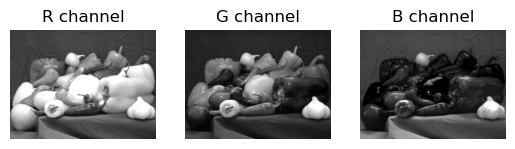

In [4]:
plt.subplot(131)
plt.imshow(R, cmap='gray')
plt.title('R channel')
plt.axis('off')
plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.title('G channel')
plt.axis('off')
plt.subplot(133)
plt.imshow(B, cmap='gray')
plt.title('B channel')
plt.axis('off')

In [5]:
R.shape

(384, 512)

In [6]:
R

array([[ 62,  63,  63, ...,  64,  63,  64],
       [ 63,  61,  59, ...,  61,  58,  56],
       [ 65,  63,  63, ...,  64,  62,  57],
       ...,
       [119, 118, 120, ...,  45,  45,  40],
       [113, 111, 115, ...,  41,  44,  45],
       [111, 114, 115, ...,  40,  42,  46]], dtype=uint8)

## Q2-1. Modify the red component

(-0.5, 511.5, 383.5, -0.5)

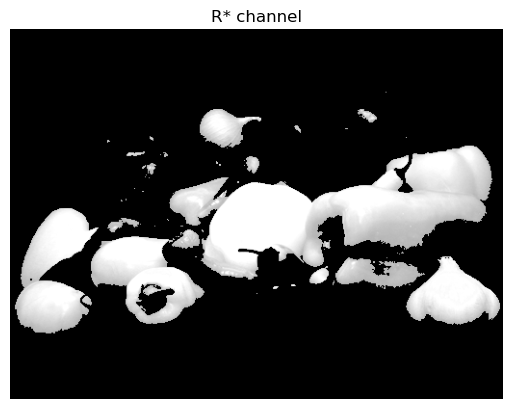

In [7]:
# R^* (x,y)=R(x,y) if R(x,y)>180^0 and R^* (x,y)=0 if R(x,y)≤180^0
R_i = copy.deepcopy(R)
G_i = copy.deepcopy(G)
B_i = copy.deepcopy(B)
# G^* (x,y)=0 and B^* (x,y)=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        G_i[i, j] = 0
        B_i[i, j] = 0
        if R[i, j] > 180:
            R_i[i, j] = R[i, j]
        else:
            R_i[i, j] = 0
plt.imshow(R_i, cmap='gray')
plt.title('R* channel')
plt.axis('off')

In [8]:
B_i

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Q2-2. Plot the modified image f^* (x,y)=[R^* (x,y),G^* (x,y),B^* (x,y)]

(-0.5, 511.5, 383.5, -0.5)

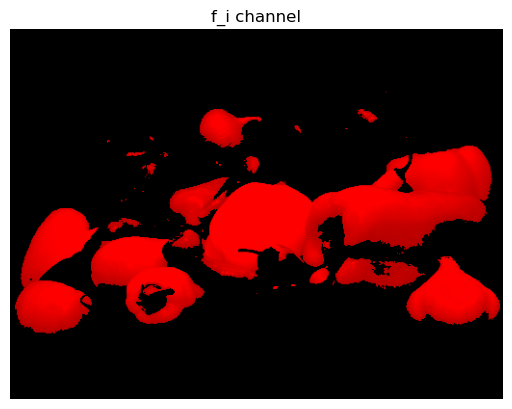

In [9]:
f_i = copy.deepcopy(img[:,:,:])
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        f_i[i, j] = [R_i[i, j], G_i[i, j], B_i[i, j]]
plt.imshow(f_i)
plt.title('f_i channel')
plt.axis('off')

## Q3. modify the image f(x,y) so that only reddish peppers and reddish chili peppers are shown. 

[R, G, B]일때 검정[0,0,0], 파랑[0,0,255], 녹색[0,255,0], 시안[0,255,255], 빨강[255,0,0], 마젠타[255,0,255], 노랑[255,255,0], 흰색[255,255,255]

현재까지 진행된 것을 기반을 생각해봤을 때, B(x,y) = 0, G(x,y)=0으로 했으니, 파랑[0,0,255]->[0,0,0]으로 검정이 됨, 녹색[0,255,0]->[0,0,0]으로 검정이 됨, 시안[0,255,255]->[0,0,0]으로 검정이 됨, 빨강은 그대로 빨강, 마젠타[255,0,255]->[255,0,0]으로 빨강이 됨, 노랑[255,255,0]->[255,0,0]으로 빨강이 됨, 흰색[255,255,255]->[255,0,0]으로 빨강이 됨. 따라서 f_i = [R_i, G_i, B_i]의 결과에 마늘(흰색)이 빨간색으로 보이는 것

step1. 원래 이미지에서 마젠타, 흰색, 노랑에 대한 조건을 먼저 부여  
step2. 그 다음에, B(x,y) = 0, G(x,y)=0으로 한다.  
step3. 시각화해서 결과를 본 다음에, 빨간색의 범위를 정한다.(그림에 토마토도 있는데 토마토도 빨간색이기 때문에)

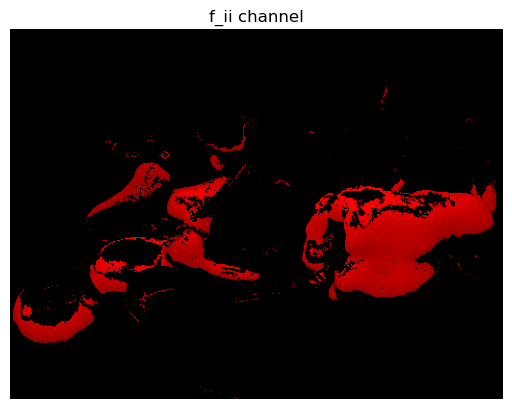

In [10]:
R_ii = copy.deepcopy(R)
f_ii = copy.deepcopy(img[:,:,:])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        is_white   = R[i, j] > 100 and G[i, j] > 100 and B[i, j] > 100
        is_yellow  = R[i, j] > 180 and G[i, j] > 90 and B[i, j] <= 180
        is_magenta = R[i, j] > 100 and G[i, j] <= 180 and B[i, j] > 180
        is_orange  = R[i, j] > 100 and G[i, j] > 50 and B[i, j] <= 60
        # is_tomato = R[i, j] > 70 and R[i, j] < 180 and G[i, j] < 50 and B[i, j] < 50
        
        if is_white or is_yellow or is_magenta or is_orange:
            R_ii[i, j] = 0  
        elif R[i, j] > 150:
            R_ii[i, j] = R[i, j]
        else:
            R_ii[i, j] = 0
        
        f_ii[i, j] = [R_ii[i, j], 0, 0]  # G, B는 항상 0

# 시각화
plt.imshow(f_ii)
plt.title('f_ii channel')
plt.axis('off')
plt.show()


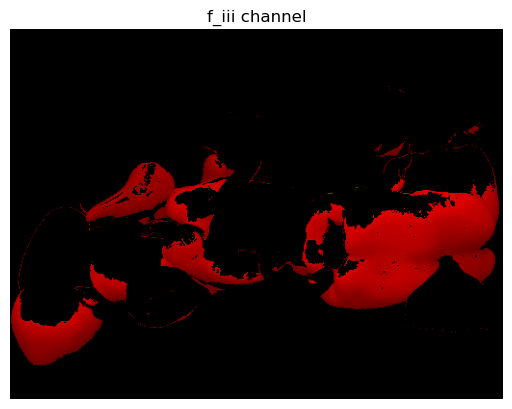

In [35]:
R_iii = copy.deepcopy(R)
f_iii = copy.deepcopy(img[:,:,:])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        # 흰색: 모든 채널이 매우 높은 경우
        is_white   = R[i, j] > 200 and G[i, j] > 200 and B[i, j] > 200
        # 노란색: R과 G가 매우 높고 B가 낮은 경우
        is_yellow  = R[i, j] > 200 and G[i, j] > 200 and B[i, j] < 100
        # 마젠타: R과 B가 매우 높고 G가 낮은 경우
        is_magenta = R[i, j] > 200 and G[i, j] < 100 and B[i, j] > 200
        # 오렌지: R이 매우 높고, G는 중간, B는 낮은 경우
        is_orange  = R[i, j] > 180 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        is_tomato  = R[i, j] > 140 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        
        # 위 색상들은 제거합니다.
        if is_white or is_yellow or is_magenta or is_orange or is_tomato:
            R_iii[i, j] = 0  
        # 빨간 파프리카와 빨간 고추: R은 높고, G와 B는 상대적으로 낮은 경우
        elif R[i, j] > 100 and G[i, j] < 80 and B[i, j] < 80:
            R_iii[i, j] = R[i, j]
        else:
            R_iii[i, j] = 0
        
        f_iii[i, j] = [R_iii[i, j], 0, 0]  # G와 B는 항상 0으로 설정

# 시각화
plt.imshow(f_iii)
plt.title('f_iii channel')
plt.axis('off')
plt.show()


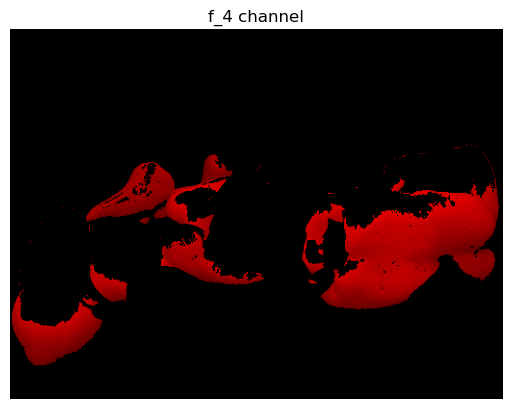

In [11]:
R_4 = copy.deepcopy(R)
f_4 = copy.deepcopy(img[:, :, :])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        is_white   = R[i, j] > 200 and G[i, j] > 200 and B[i, j] > 200
        is_yellow  = R[i, j] > 200 and G[i, j] > 200 and B[i, j] < 100
        is_magenta = R[i, j] > 200 and G[i, j] < 100 and B[i, j] > 200
        is_orange  = R[i, j] > 150 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        is_tomato  = R[i, j] > 100 and ((G[i, j] >= 80) or (B[i, j] >= 80))
        
        # 위 색상들은 제거합니다.
        if is_white or is_yellow or is_magenta or is_orange or is_tomato:
            R_4[i, j] = 0  
        elif R[i, j] > 100 and G[i, j] < 100 and B[i, j] < 90 and (R[i, j] - max(G[i, j], B[i, j]) > 80):
            R_4[i, j] = R[i, j]
        else:
            R_4[i, j] = 0
        
        f_4[i, j] = [R_4[i, j], 0, 0]  # G와 B는 항상 0으로 설정

# 시각화
plt.imshow(f_4)
plt.title('f_4 channel')
plt.axis('off')
plt.show()


## Q4-1. Plot the histogram of I(x,y) to check the intensity distribution.

이미지에서 너무 밝은 부분이나 너무 어두운 부분은 자세한 내용을 보기 어렵다. 그 이유는 비슷한 intensity를 갖는 픽셀들이 한 곳에 모여있기 때문이다. 여기서 intensity란 그레이 이미지에서 0(검정색), 255(흰색)값을 말한다. RGB에서는 각 채널 당 intensity를 갖는다. 픽섹들의 intensity를 변경하게 되면, 이에 따라 히스토그램도 변경되는데 이를 histofram modeling or transfer라고 한다. 대표적인 histogram modeling이 histogram equalization이다. histogram equalization의 목적은 intensity들이 골고루 사용되게 하는 것이다.  
openCV에서는 CDF로 histogram equalization을 한다. 

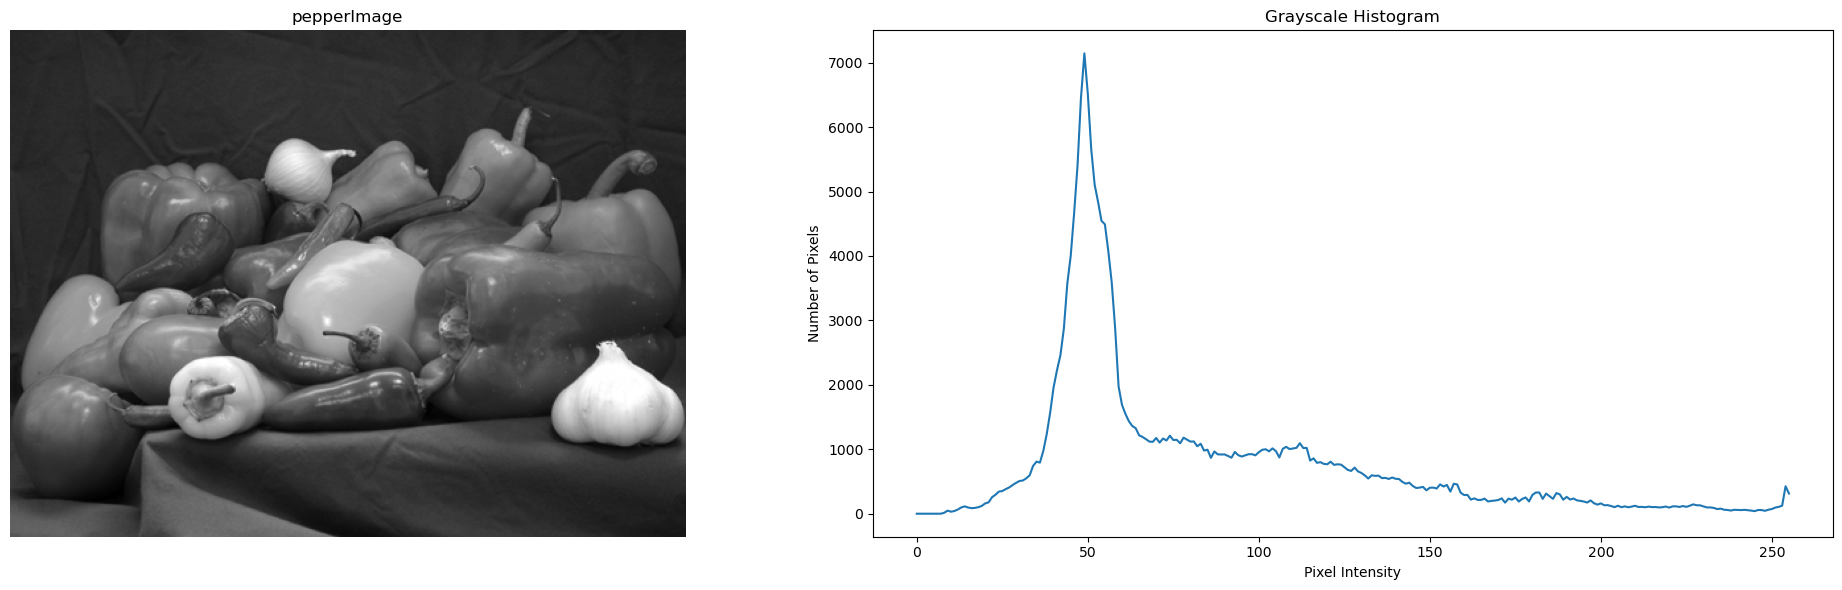

In [19]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
histogram = cv2.calcHist([img2], [0], None, [256], [0, 256]) #(이미지, 채널, 마스크, 히스토그램 크기, 범위)

plt.figure(figsize=(30, 6))

plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('pepperImage')
plt.axis('off')

plt.subplot(132)
plt.plot(histogram)
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('Grayscale Histogram')

plt.tight_layout()
plt.show()

https://www.geeksforgeeks.org/opencv-python-program-analyze-image-using-histogram/

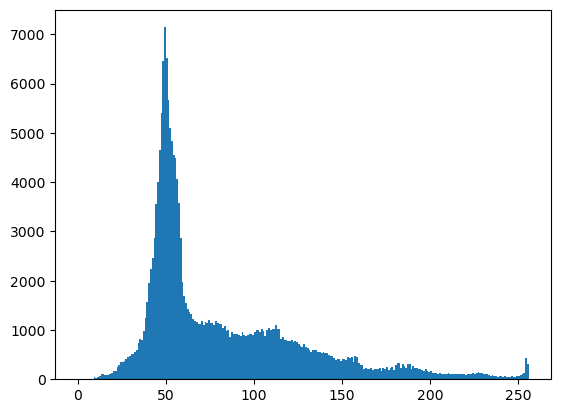

In [13]:
plt.hist(img2.ravel(), 256, [0, 256])
plt.show()

## Q4-2. Using a histogram equalization method, make a new image I^* (x,y) from I(x,y) so that the intensity is uniformly distributed

### numpy를 이용해서 histogram equlization

누적분포함수(cdf) : 랜던 변수가 특정 값보다 작거나 같을 확률를 나타내는 함수, 특정 값보다 작은 값들의 확률를 모두 누적해서 구한다.

히스토그램 함수 h(g) 구하기 -> 정규화된 히스토그램 함수 구하기 p(g) = h(g)/(w*h) -> cdf 함수 구하기 -> 변환 함수 dst(x,y) = round(cdf(src(x,y))*L_max)  
https://overface.tistory.com/597

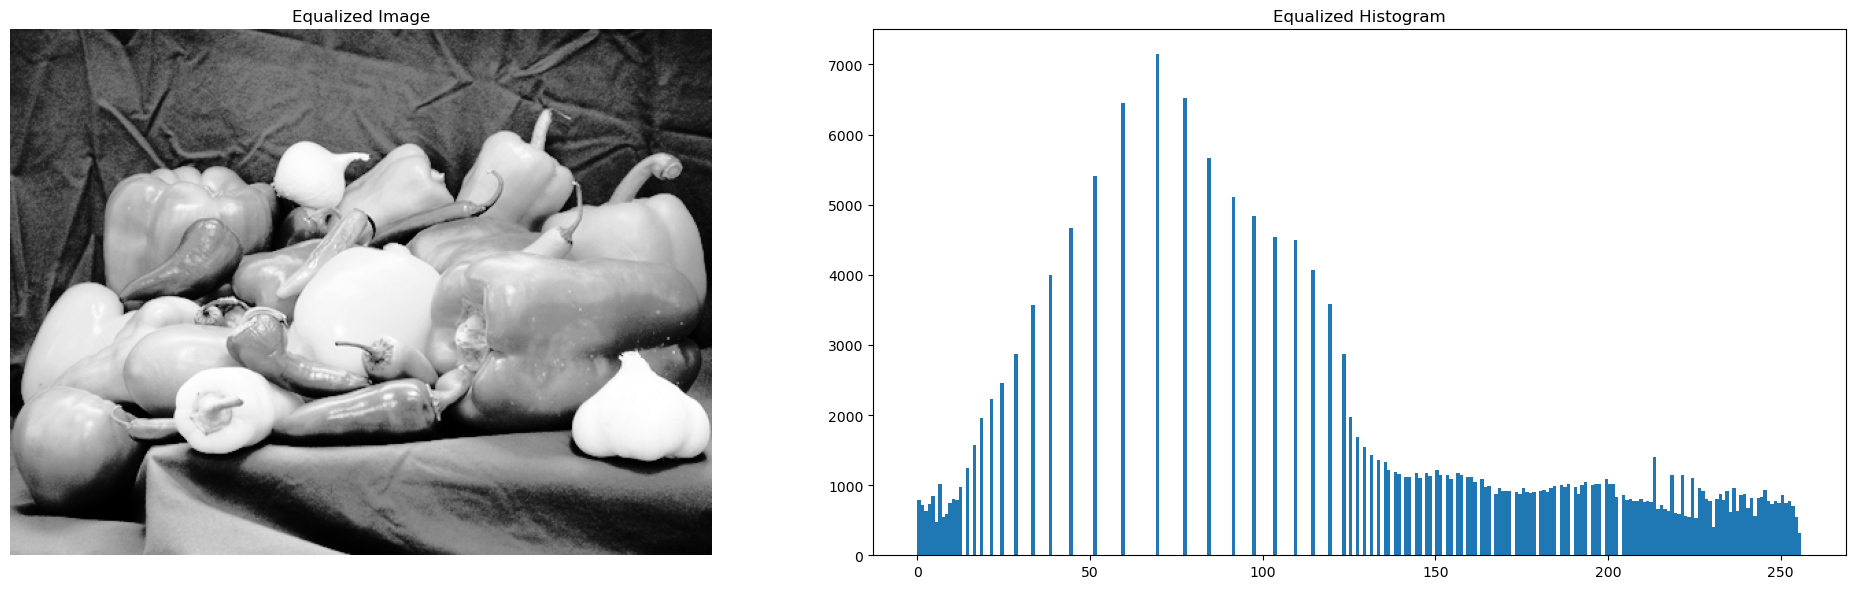

In [14]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256]) # flatten() : 1차원으로 변환, (input data, bins, range, density, weights)
cdf = hist.cumsum() # 누적합 -> 이렇게 계산하면 cdf은 0~cdf.max() 사이의 값이 된다.
# pdf은 히스토그램을 정규화한 것, cdf은 pdf의 누적합으로 어두운 픽셀부터 차곡차곡 더한 확률 값이다. cdf은 픽셀 값을 새로운 밝기 값으로 매핑하기 위해서 사용하는데 0~1사이
# 값이 아니라 누적 값이기 때문에 0~255 사이의 값으로 정규화 해줘야 한다.
# cdf_normalized = cdf * float(hist.max()) / cdf.max() # cdf를 시각화를 위한 정규화

cdf_m = np.ma.masked_equal(cdf,0) # cdf에서 0인 값은 무시하고 나머지 값만을 가지고 cdf를 계산
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) # cdf를 0~255 사이로 정규화 
cdf = np.ma.filled(cdf_m, 0).astype('uint8') # cdf를 uint8로 변환
equalized_img = cdf[img2] # cdf를 이용하여 원본 이미지의 픽셀 값을 새로운 밝기 값으로 매핑

plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(132)
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()

전체적인 흐름은, 히스토그램계산 & cdf 계산 -> cdf에서 0 제거 & 정규화 -> 픽셀 값 매핑 & 평활된 이미지 생성

## openCV 함수 활용하기

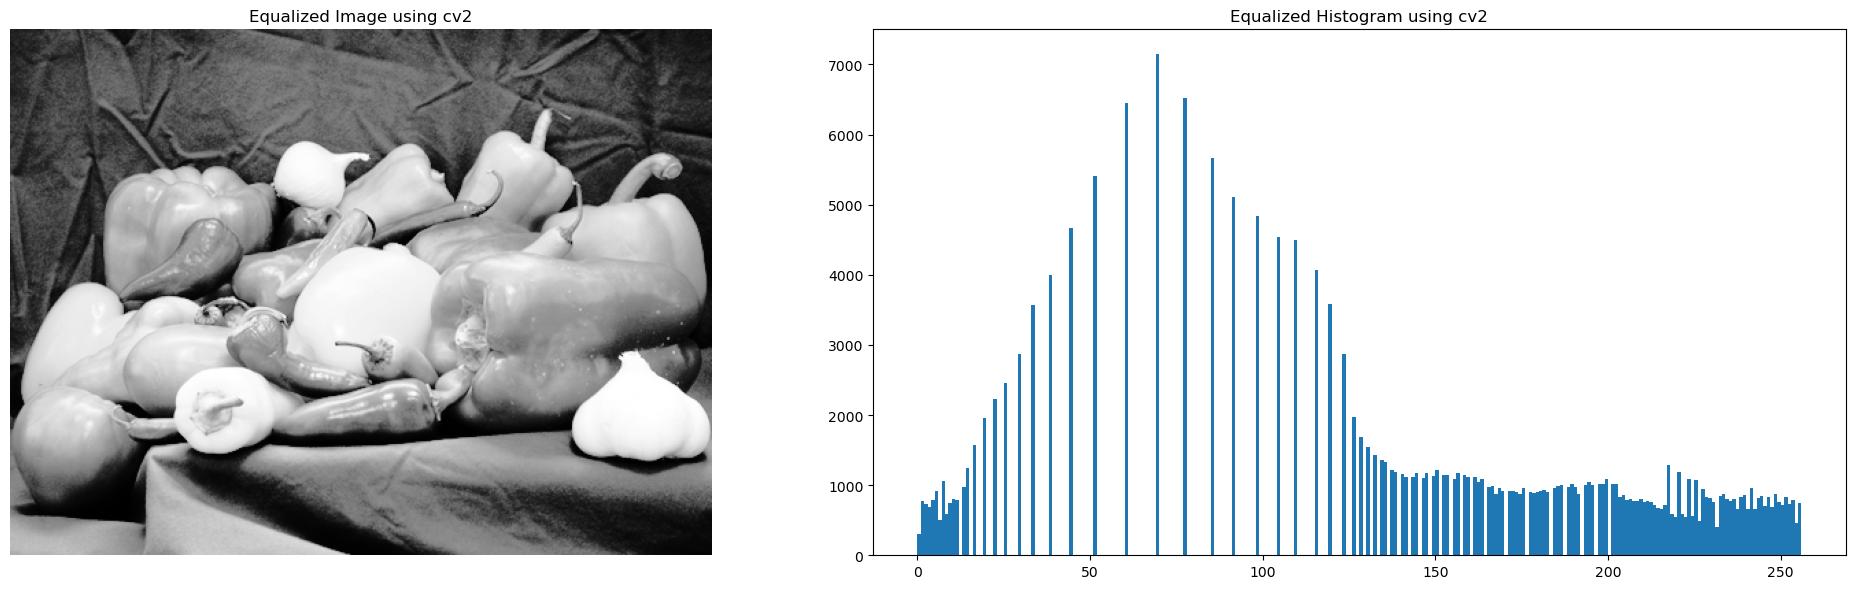

In [31]:
equalized_img2 = cv2.equalizeHist(img2) # cv2를 이용한 히스토그램 평활화
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(equalized_img2, cmap='gray')
plt.title('Equalized Image using cv2')
plt.axis('off')

plt.subplot(132)
plt.hist(equalized_img2.ravel(), 256, [0, 256])
plt.title('Equalized Histogram using cv2')
plt.tight_layout()
plt.show()

##  Q5-1. Make a new image I^(**) (x,y) so that the intensity values in the image have the Gaussian distribution. 

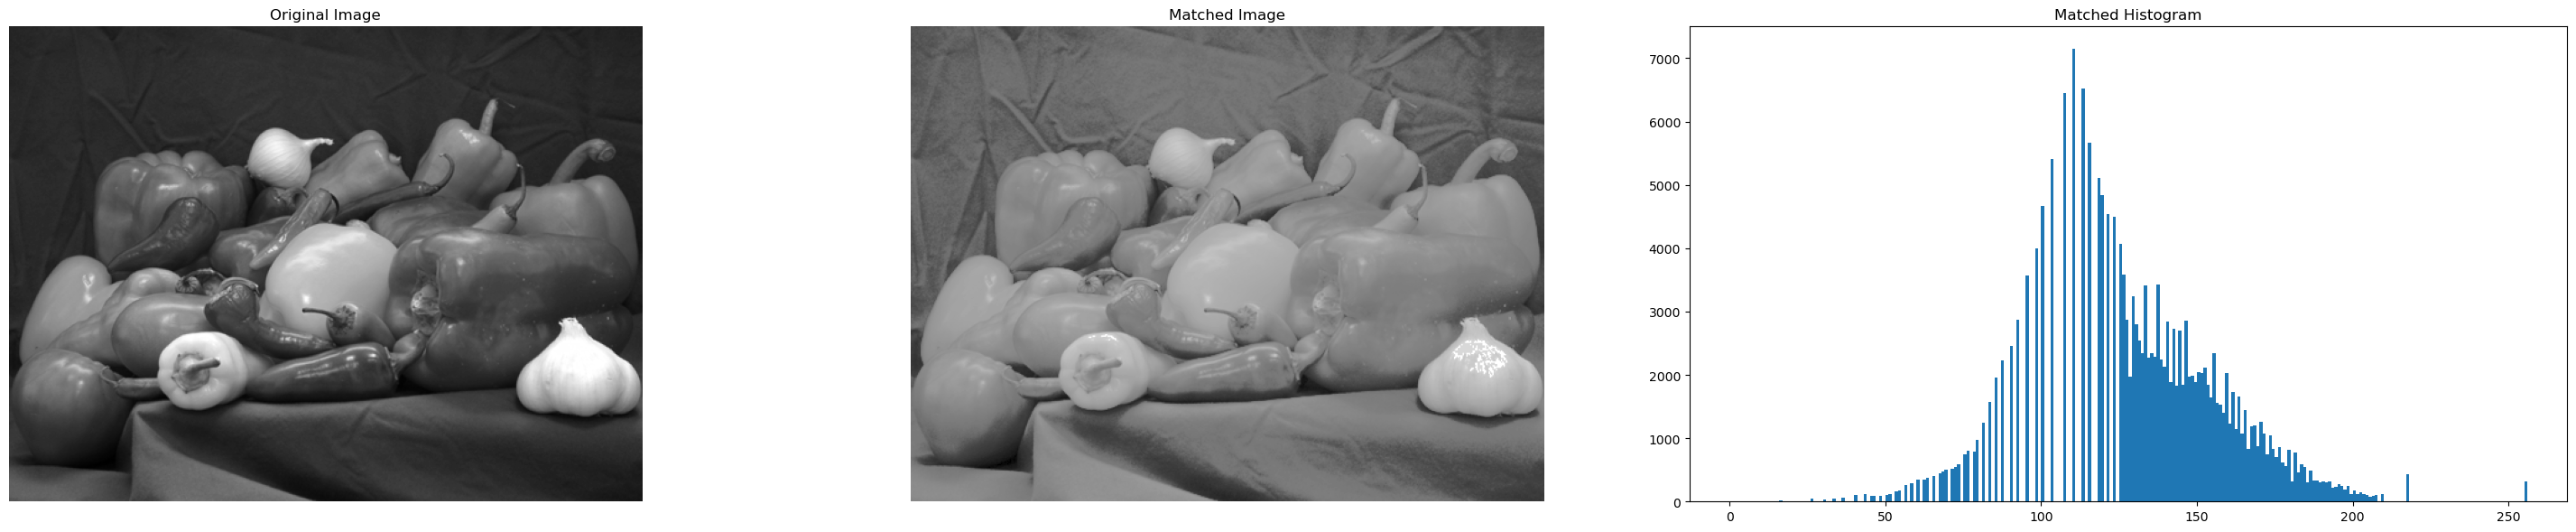

In [59]:
# 가우시안은 정규분포를 따르는 확률 밀도 함수로, 평균과 표준편차로 정의된다.
mean = 130
std = 30
gaussian_img = np.random.normal(mean, std, img2.shape)
gaussian_img = np.clip(gaussian_img, 0, 255).astype(np.uint8) # 0~255 사이의 값으로 클리핑
matched_img = match_histograms(img2, gaussian_img, channel_axis=None) # 히스토그램 매칭

plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.subplot(133)
plt.hist(matched_img.ravel(), 256, [0, 256])
plt.title('Matched Histogram')
plt.tight_layout()
plt.show()

(150, 30)

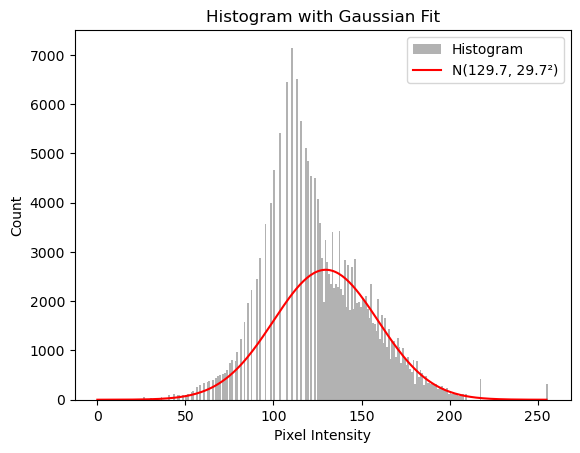

In [60]:
from scipy.stats import norm

# 정규분포 곡선용 x축
x = np.linspace(0, 255, 256)
mean_val = np.mean(matched_img)
std_val = np.std(matched_img)
pdf = norm.pdf(x, mean_val, std_val) * matched_img.size  # 스케일 맞춤

plt.hist(matched_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.6, label='Histogram')
plt.plot(x, pdf, 'r-', label=f'N({mean_val:.1f}, {std_val:.1f}²)')
plt.title('Histogram with Gaussian Fit')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()
plt.show()


기준 : 이미지 전체에 밝고 어두운 픽셀이 고르게 분포되어 있는가, 경계가 뚜렷하지 않고 밝기 변화가 부드러운가, 거의 모든 밝기 구간(예: 50~200)을 적절히 포함하는가

원본보다 전반적으로 밝은 부분이 증가하고 어두운 부분은 줄어들어, 가우시안 분포의 중심이 반영된 것으로 보인다. 

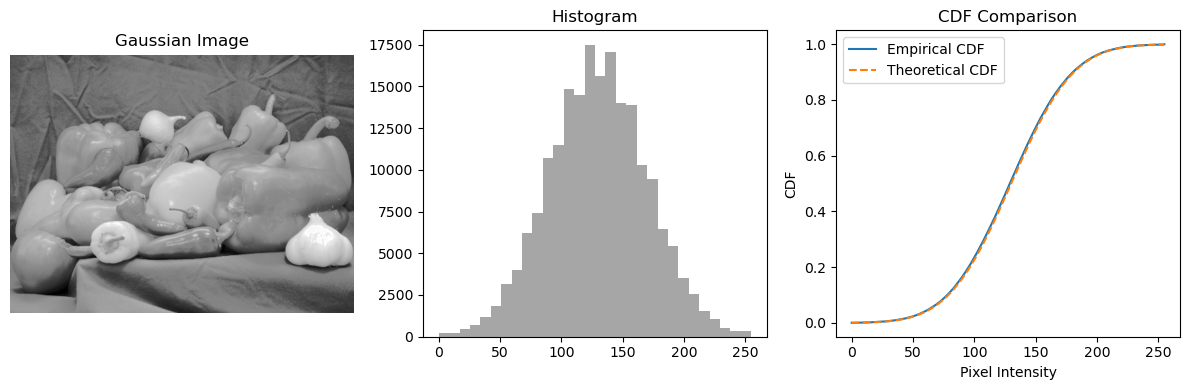

In [ ]:
from scipy.stats import norm

mean = 130
std = 40

gaussian_img = np.random.normal(mean, std, img2.shape)
gaussian_img = np.clip(gaussian_img, 0, 255).astype(np.uint8)
from skimage.exposure import match_histograms

matched_img = match_histograms(img2, gaussian_img, channel_axis=None)

# 2. 히스토그램 및 CDF 계산
hist, bins = np.histogram(gaussian_img.flatten(), bins=256, range=[0, 256])
cdf_empirical = hist.cumsum()
cdf_empirical = cdf_empirical / cdf_empirical[-1]  # 정규화

# 3. 이론적 정규분포 CDF 계산
x_vals = np.arange(256)
cdf_theoretical = norm.cdf(x_vals, loc=mean, scale=std)

# 4. 시각화

# 📷 가우시안 이미지
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(matched_img, cmap='gray')
plt.title("Gaussian Image")
plt.axis('off')

# 📊 히스토그램
plt.subplot(1, 3, 2)
plt.hist(gaussian_img.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Histogram")

# 📈 CDF 비교
plt.subplot(1, 3, 3)
plt.plot(x_vals, cdf_empirical, label="Empirical CDF")
plt.plot(x_vals, cdf_theoretical, label="Theoretical CDF", linestyle='--')
plt.title("CDF Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("CDF")
plt.legend()

plt.tight_layout()
plt.show()


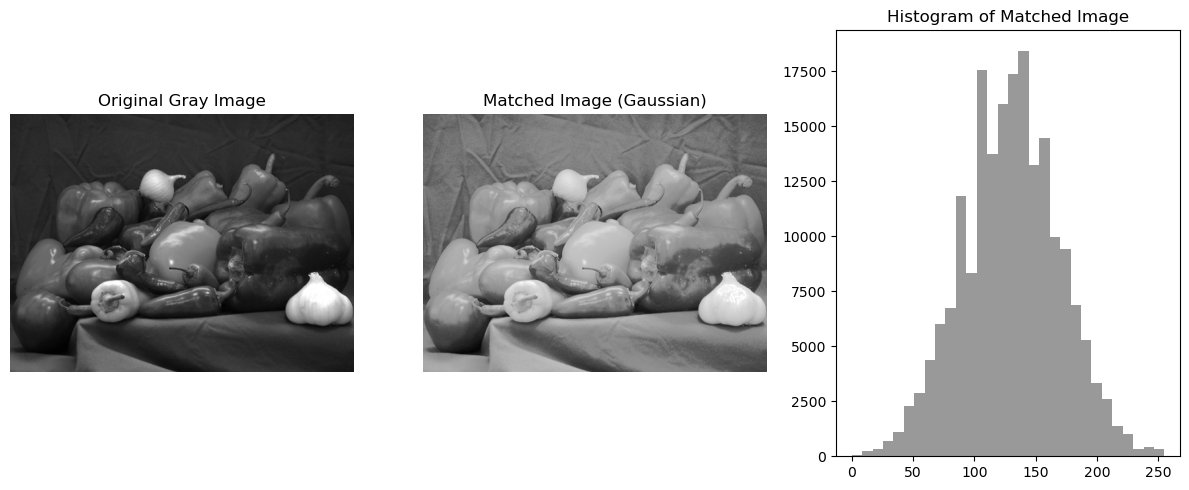

In [47]:
from scipy.stats import norm

# 1. 이미지 불러오기
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. 원본 grayscale 이미지의 CDF 계산
hist, _ = np.histogram(gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]  # 정규화된 CDF [0~1]

# 3. 정규분포 PDF, CDF 생성 (목표 분포)
mean = 130
std = 40
x = np.arange(256)
pdf = norm.pdf(x, loc=mean, scale=std)
pdf /= pdf.sum()  # 정규화
target_cdf = np.cumsum(pdf)

# 4. CDF 기반 히스토그램 매칭
mapping = np.interp(cdf, target_cdf, x)
matched_img = mapping[gray].astype(np.uint8)

# 5. 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image (Gaussian)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(matched_img.ravel(), bins=30, color='gray', alpha=0.8)
plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

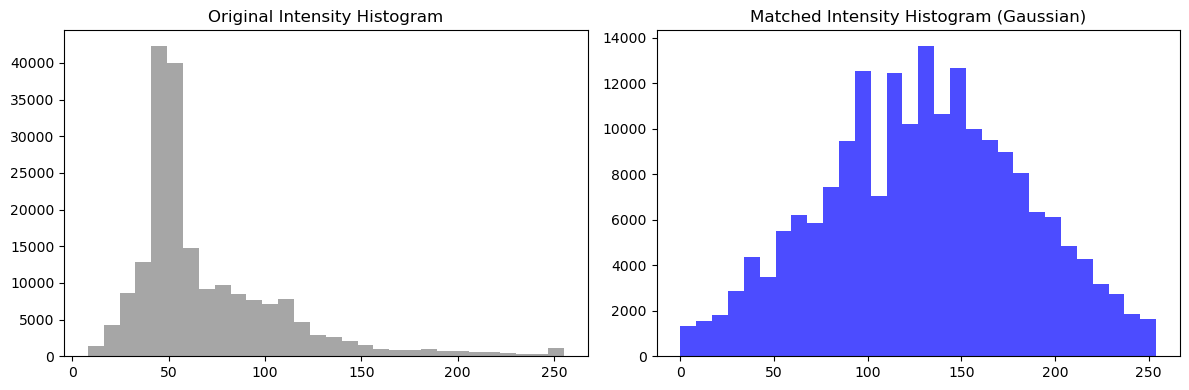

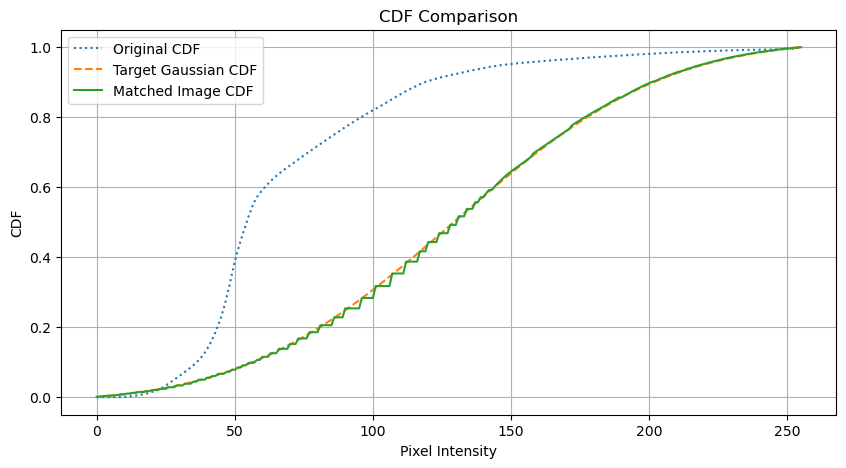

📊 MSE between Matched CDF and Target Gaussian CDF: 0.000034


In [45]:
# 5. 매칭된 이미지의 히스토그램과 CDF
hist_matched, _ = np.histogram(matched_img.flatten(), 256, [0, 256])
cdf_matched = hist_matched.cumsum()
cdf_matched = cdf_matched / cdf_matched[-1]
from sklearn.metrics import mean_squared_error
# 6. MSE (CDF 기준) 계산
mse_cdf = mean_squared_error(target_cdf, cdf_matched)

# =======================
# 🎯 1. 히스토그램 비교
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Original Intensity Histogram")

plt.subplot(1, 2, 2)
plt.hist(matched_img.ravel(), bins=30, color='blue', alpha=0.7)
plt.title("Matched Intensity Histogram (Gaussian)")

plt.tight_layout()
plt.show()

# =======================
# 🎯 2. CDF 비교
plt.figure(figsize=(10, 5))
plt.plot(x, cdf, label='Original CDF', linestyle='dotted')
plt.plot(x, target_cdf, label='Target Gaussian CDF', linestyle='--')
plt.plot(x, cdf_matched, label='Matched Image CDF', linestyle='-')
plt.title("CDF Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

# =======================
# 🎯 3. MSE 출력
print(f"📊 MSE between Matched CDF and Target Gaussian CDF: {mse_cdf:.6f}")